In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Text(0.5, 0, 'House size in square feet')

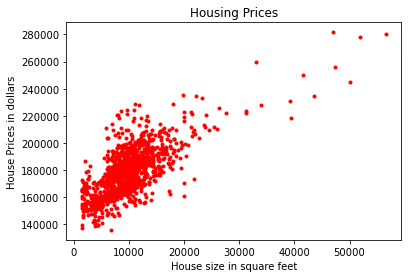

In [2]:
cwd = os.getcwd()

df = pd.read_csv(cwd + '\\..' + '\\test.csv')
df1 = pd.read_csv(cwd + '\\..' + '\\sample_submission.csv')

df1 = df1['SalePrice']
df = df['LotArea']

plt.scatter(df, df1, marker='.', c='r',)

plt.title('Housing Prices')

plt.ylabel('House Prices in dollars')

plt.xlabel('House size in square feet')

In [3]:
def compute_model_output(x, w, b):
    # Como se fosse um len = 1459
    m = x.shape[0]
    # Cria um array com índices contendo 0 para cada x.shape[0]
    f_wb = np.zeros(m)
    # Cria um loop que percorre 1459 iterações
    for i in range(m):
        # Vai trocar o valor de 0 no índice i para os pontos que formarão a Linha da regressão linear
        f_wb[i] = w * x[i] + b

    # 
    return f_wb

In [12]:
somatorio_x = df.sum()
somatorio_y = df1.sum()
n = df.shape[0]
lista = np.zeros(df.shape[0])
lista1 = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    lista[i] = np.power(df[i], 2)
    lista1[i] = df[i] * df1[i]

somatorio_x2 = lista.sum()
somatorio_xy = lista1.sum()

alpha = (n * (somatorio_xy) - somatorio_x * somatorio_y) / (n * somatorio_x2 - np.power(somatorio_x, 2)) 

beta = (somatorio_y / n) - alpha * (somatorio_x / n)

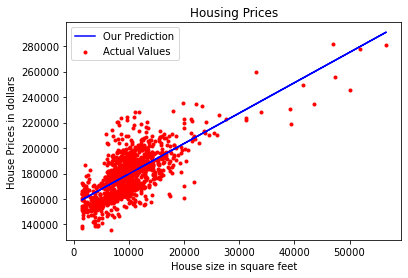

In [13]:
x_train = df
y_train = df1
w = alpha
b = beta

tmp_f_wb = compute_model_output(x_train, w, b,)

plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

plt.scatter(x_train, y_train, marker='.', c='r', label='Actual Values')

plt.title('Housing Prices')

plt.ylabel('House Prices in dollars')

plt.xlabel('House size in square feet')

plt.legend()
plt.show()

In [14]:
w = alpha
b = beta
x_i = 1200
cost_1200sqft = w * x_i + b

print(f"${cost_1200sqft:.0f} thousand dollars")

$158619 thousand dollars
